# STAGE 2 DATA PRE-PROCESSING

## IMPORT LIBRARY AND LOAD DATA

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split

plt.style.use('dark_background')

In [4]:
df = pd.read_csv('E commerce Train.csv')

In [5]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [6]:
tes1 = df.columns

In [11]:
# Split data
X = df[['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']]
y = df[['Reached.on.Time_Y.N']]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=17)

In [8]:
print(df.shape)
print(Xtrain.shape)
print(Xtest.shape)

(10999, 12)
(7699, 10)
(3300, 10)


## 1. DATA CLEANSING

### A. Missing Data

In [9]:
Xtrain.info() #cek dapakah ada yang hilang

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7699 entries, 6381 to 10863
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      7699 non-null   object
 1   Mode_of_Shipment     7699 non-null   object
 2   Customer_care_calls  7699 non-null   int64 
 3   Customer_rating      7699 non-null   int64 
 4   Cost_of_the_Product  7699 non-null   int64 
 5   Prior_purchases      7699 non-null   int64 
 6   Product_importance   7699 non-null   object
 7   Gender               7699 non-null   object
 8   Discount_offered     7699 non-null   int64 
 9   Weight_in_gms        7699 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 661.6+ KB


In [10]:
Xtrain.isna().sum() #cek data yang kosong

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

- **Tidak ada data yang null/hilang**, tidak perlu ada proses lanjutan

### B. Duplicated Data

In [12]:
Xtrain.duplicated().sum()

0

In [13]:
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
5460,5461,D,Road,7,3,281,4,low,F,4,1480,0
4320,4321,D,Ship,4,3,258,3,high,F,1,4653,0
4722,4723,D,Ship,3,2,191,2,medium,M,7,5357,0
10358,10359,A,Ship,4,1,265,3,low,F,4,4249,0
4798,4799,C,Flight,6,1,265,4,low,F,7,1644,1


### C. Handle Outliers

#### IQR OUTLINERS

In [18]:
print(f'Jumlah baris sebelum memfilter outlier: {len(Xtrain)}')

filtered_entries = np.array([True] * len(Xtrain))
for col in ['Prior_purchases','Discount_offered']:
    Q1 = Xtrain[col].quantile(0.25)
    Q3 = Xtrain[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((Xtrain[col] >= low_limit) & (Xtrain[col] <= high_limit)) & filtered_entries
    
Xtrainout = Xtrain[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(Xtrainout)}')

Jumlah baris sebelum memfilter outlier: 7699
Jumlah baris setelah memfilter outlier: 5557


### D. Feature transformation

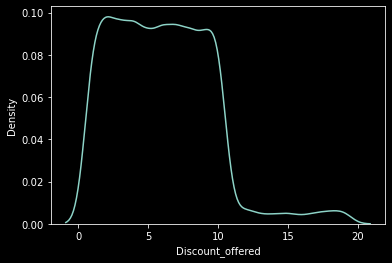

In [19]:
sns.kdeplot(Xtrainout['Discount_offered'])
plt.show()

In [20]:
Xtrainout['log_Discount_offered'] = np.log(Xtrainout['Discount_offered'])

In [21]:
X.shape

(10999, 10)

In [22]:
y.shape

(10999, 1)

<AxesSubplot:xlabel='log_Discount_offered', ylabel='Density'>

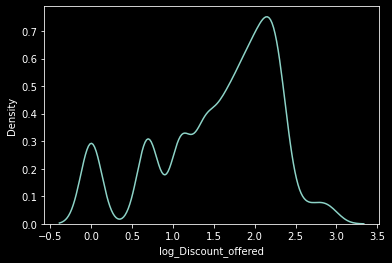

In [23]:
sns.kdeplot(Xtrainout['log_Discount_offered'])

In [24]:
Xtrainout = Xtrainout.drop(columns=['Discount_offered'])

In [25]:
Xtrainout

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Weight_in_gms,log_Discount_offered
6381,B,Ship,4,3,271,2,medium,M,4967,2.197225
6944,A,Ship,3,5,155,4,low,F,4432,0.000000
1508,A,Flight,4,5,259,2,medium,M,2381,2.708050
6166,C,Flight,4,3,250,2,medium,M,4808,1.386294
10574,A,Ship,3,2,144,4,medium,M,4867,2.079442
...,...,...,...,...,...,...,...,...,...,...
8470,C,Road,3,5,135,2,medium,M,5331,1.945910
6061,F,Ship,3,5,271,2,medium,M,4958,1.945910
10992,D,Ship,5,1,236,5,medium,M,1906,1.098612
9529,F,Ship,3,1,266,3,low,M,4010,1.791759


In [26]:
Xtrainout.shape

(5557, 10)

In [27]:
Xtrainout.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Weight_in_gms,log_Discount_offered
count,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000
mean,4.130646,2.997301,213.368904,3.286665,3963.361706,1.562417
std,1.175337,1.416691,48.060234,0.994798,1620.259808,0.729467
min,2.000000,1.000000,96.000000,2.000000,1002.000000,0.000000
25%,3.000000,2.000000,173.000000,3.000000,1965.000000,1.098612
50%,4.000000,3.000000,219.000000,3.000000,4520.000000,1.791759
75%,5.000000,4.000000,253.000000,4.000000,5248.000000,2.079442
max,7.000000,5.000000,310.000000,5.000000,6102.000000,2.944439


### E. Feature Encoding

#### Label

In [28]:
map_gender = {'M' : 0, 'F':1}

In [29]:
Xtrainout['enc_gender'] = Xtrainout['Gender'].map(map_gender)

In [30]:
Xtrainout.sample(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Weight_in_gms,log_Discount_offered,enc_gender
4799,F,Flight,7,2,250,5,medium,M,1327,2.197225,0
2826,D,Ship,2,3,172,3,medium,F,1522,2.397895,1
6199,F,Ship,5,2,280,4,low,M,4539,2.079442,0
8274,D,Ship,3,1,138,3,medium,F,4766,0.693147,1
9286,C,Ship,3,4,180,3,low,M,5659,0.693147,0


In [31]:
map_Pi = {'low' : 0, 'medium':1, 'high':2}

In [32]:
Xtrainout['enc_Product_importance'] = Xtrainout['Product_importance'].map(map_Pi)

In [33]:
Xtrainout.sample(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Weight_in_gms,log_Discount_offered,enc_gender,enc_Product_importance
8018,A,Ship,4,1,226,5,medium,M,1510,1.791759,0,1
9956,A,Ship,5,2,269,5,medium,F,1113,2.302585,1,1
9971,F,Ship,3,3,137,3,low,F,4742,2.079442,1,0
4994,A,Ship,3,3,269,3,high,F,4260,1.791759,1,2
9198,D,Ship,4,4,267,4,low,F,5219,2.079442,1,0


#### One Hot

In [34]:
ohe = pd.get_dummies(Xtrainout['Mode_of_Shipment'], prefix='mode')
ohe

,mode_Flight,mode_Road,mode_Ship
6381,0,0,1
6944,0,0,1
1508,1,0,0
6166,1,0,0
10574,0,0,1
...,...,...,...
8470,0,1,0
6061,0,0,1
10992,0,0,1
9529,0,0,1


In [43]:
# pd.get_dummies(df['Warehouse_block'], prefix='Warehouse')

- Fitur warehouse block tidak terlalu berpengaruh terhadap goalsnya sehingga tidak perlu dilakukan `One Hot Encoding`

In [44]:
Xtrainfinal = Xtrainout.join(ohe)

In [45]:
Xtrainfinal.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Weight_in_gms,log_Discount_offered,enc_gender,enc_Product_importance,mode_Flight,mode_Road,mode_Ship
6381,B,Ship,4,3,271,2,medium,M,4967,2.197225,0,1,0,0,1
6944,A,Ship,3,5,155,4,low,F,4432,0.000000,1,0,0,0,1
1508,A,Flight,4,5,259,2,medium,M,2381,2.708050,0,1,1,0,0
6166,C,Flight,4,3,250,2,medium,M,4808,1.386294,0,1,1,0,0
10574,A,Ship,3,2,144,4,medium,M,4867,2.079442,0,1,0,0,1


In [46]:
Xtrainfinal.shape

(5557, 15)

#### Class Imbalance

In [47]:
# ytest['Reached.on.Time_Y.N'].value_counts()
ytrain['Reached.on.Time_Y.N'].value_counts() 

1    4605
0    3094
Name: Reached.on.Time_Y.N, dtype: int64

- Berdasarkan derajat ketimpangan data, rasio fitur 'Reached.on.Time' tidak termasuk kedalam kategori **imbalance**

## 2. FEATURE ENGINEERING

#### A. Feature selection

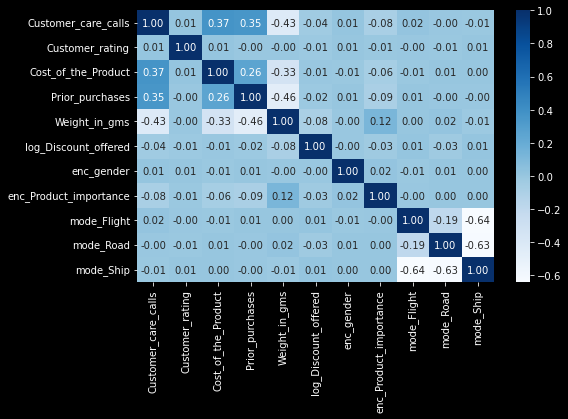

In [48]:
plt.figure(figsize=(8,5))
sns.heatmap(Xtrainfinal.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

- Saat ini semua fitur akan digunakan karena fitur yang ada saat ini tidak banyak
- Tidak ada fitur yang redundan, sehingga tidak perlu ada fitur yang di drop

#### B. Feature extraction

In [49]:
# Membuat klasifikasi berdasarkan fitur 'Weight_in_gms'
Xtrainfinal['weight_category'] = np.where(Xtrainfinal['Weight_in_gms'] <= 2000, 'light', 
                                          np.where(Xtrainfinal['Weight_in_gms'] <= 5000, 'medium', 'heavy') )

In [50]:
Xtrainfinal

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Weight_in_gms,log_Discount_offered,enc_gender,enc_Product_importance,mode_Flight,mode_Road,mode_Ship,weight_category
6381,B,Ship,4,3,271,2,medium,M,4967,2.197225,0,1,0,0,1,medium
6944,A,Ship,3,5,155,4,low,F,4432,0.000000,1,0,0,0,1,medium
1508,A,Flight,4,5,259,2,medium,M,2381,2.708050,0,1,1,0,0,medium
6166,C,Flight,4,3,250,2,medium,M,4808,1.386294,0,1,1,0,0,medium
10574,A,Ship,3,2,144,4,medium,M,4867,2.079442,0,1,0,0,1,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8470,C,Road,3,5,135,2,medium,M,5331,1.945910,0,1,0,1,0,heavy
6061,F,Ship,3,5,271,2,medium,M,4958,1.945910,0,1,0,0,1,medium
10992,D,Ship,5,1,236,5,medium,M,1906,1.098612,0,1,0,0,1,light
9529,F,Ship,3,1,266,3,low,M,4010,1.791759,0,0,0,0,1,medium


In [51]:
Xtrainfinal['weight_category'].value_counts()

medium    2277
heavy     1843
light     1437
Name: weight_category, dtype: int64

- Mayoritas dari berat barang masuk kedalam kategori medium

#### C. Feature tambahan

Jadi fitur yang seharusnya ada untuk membantu performansi model yaitu :
1. Shipment Date (Tanggal pengiriman barang)
2. Revenue (Cost - Discount offer)
3. Order Date (Tanggal pemesanan sekaligus pembayaran)
4. membership status (status customer berdasarkan banyaknya transaksi)